In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df = pd.read_csv("netflix_titles.csv")

In [ ]:
df.head()

- Analisi delle categorie di contenuto:

    - Determina quali sono le categorie più popolari di film e spettacoli televisivi su Netflix.
    - Calcola la distribuzione delle categorie di contenuto e visualizzale graficamente utilizzando un grafico a barre o un grafico a torta.

In [ ]:
df_movie = df[df["type"] == "Movie"]
df_movie.head()

In [ ]:
df_serietv = df[df["type"] == "TV Show"]
df_serietv.head()

In [ ]:
generi_movie = df_movie['listed_in'].str.split(', ').explode() #trasforma gli elementi di una lista in righe separate
generi_movie = generi_movie.value_counts()
print(generi_movie)

In [ ]:
plt.figure(figsize=(10,6))
generi_movie.plot(kind='bar', color='skyblue')
plt.title('Conteggio dei generi')
plt.xlabel('Genere')
plt.ylabel('Numero di titoli')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
generi_movie.plot(kind='pie')
plt.title('Distribuzione percentuale dei generi')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
generi_serietv = df_serietv['listed_in'].str.split(', ').explode()
generi_serietv = generi_serietv.value_counts()
print(generi_serietv)

In [ ]:
plt.figure(figsize=(10,6))
generi_serietv.plot(kind='bar', color='blue')
plt.title('Conteggio dei generi')
plt.xlabel('Genere')
plt.ylabel('Numero di titoli')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
generi_serietv.plot(kind='pie')
plt.title('Distribuzione percentuale dei generi')
plt.ylabel('')
plt.tight_layout()
plt.show()

Esplorazione delle valutazioni:

- Analizza la distribuzione delle valutazioni dei film e degli spettacoli televisivi su Netflix.

- Visualizza la distribuzione delle valutazioni utilizzando un istogramma.

In [ ]:
rating_movie = df_movie["rating"]
rating_movie.value_counts()

In [ ]:
count_movie = df_movie["rating"].value_counts()
plt.figure(figsize=(10,6))
count_movie.plot(kind='bar', color='blue')
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Ti')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Analisi temporale:
- Esplora le tendenze temporali dei contenuti su Netflix in base all'anno di pubblicazione.
- Visualizza l'andamento nel tempo del numero di contenuti pubblicati su Netflix utilizzando un grafico a linee.

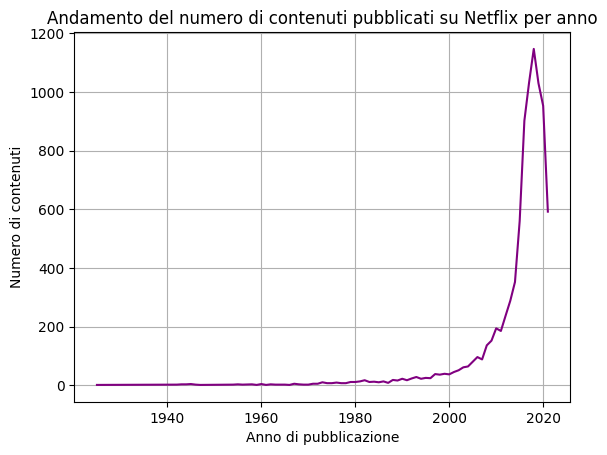

In [39]:
release_year_count = df['release_year'].value_counts().sort_index()
release_year_count.plot(kind='line', color='purple')
plt.title('Andamento del numero di contenuti pubblicati su Netflix per anno')
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Numero di contenuti')
plt.grid(True)
plt.show()

 Analisi delle distribuzioni geografiche:

 -  Esamina la distribuzione geografica dei contenuti su Netflix in base al paese di produzione.

 - Visualizza la distribuzione geografica utilizzando una mappa o un grafico a barre

In [ ]:
top_country = df['country'].dropna().str.split(', ').explode().value_counts().head(15)

C:\Users\Utente\AppData\Local\Temp\ipykernel_29656\3158425608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(


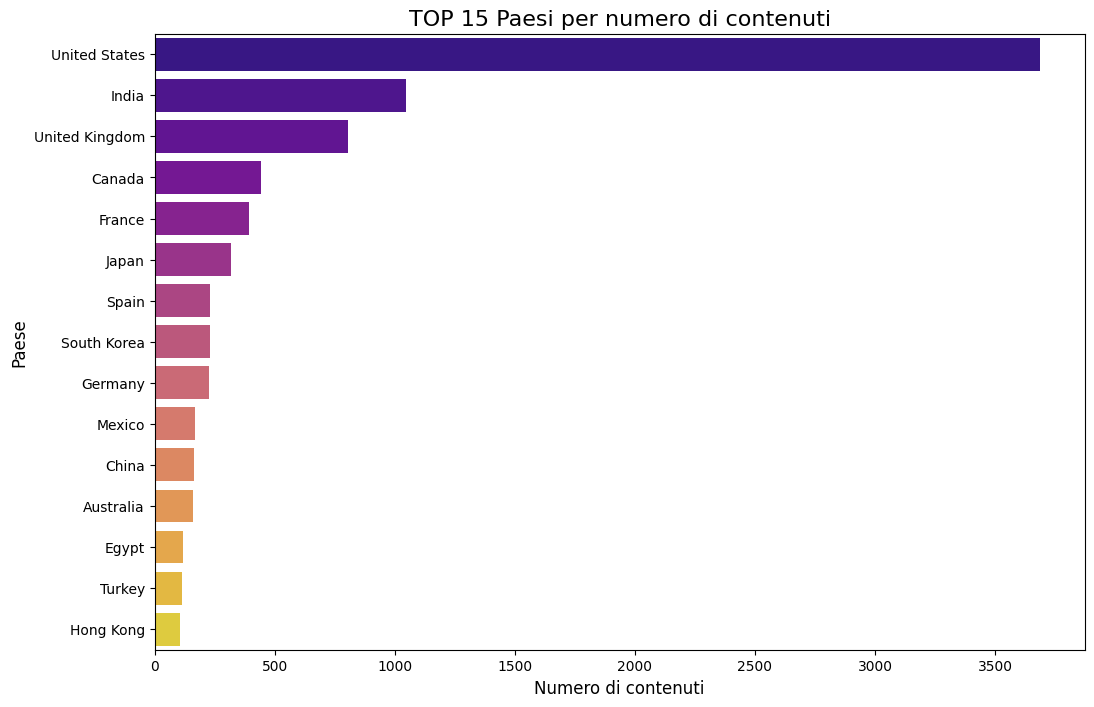

In [31]:

plt.figure(figsize=(12, 8))
sn.barplot(
    x=top_country.values,  
    y=top_country.index,   
    palette='plasma'        
)

plt.title('TOP 15 Paesi per numero di contenuti', fontsize=16)
plt.xlabel('Numero di contenuti', fontsize=12)
plt.ylabel('Paese', fontsize=12)
plt.show()

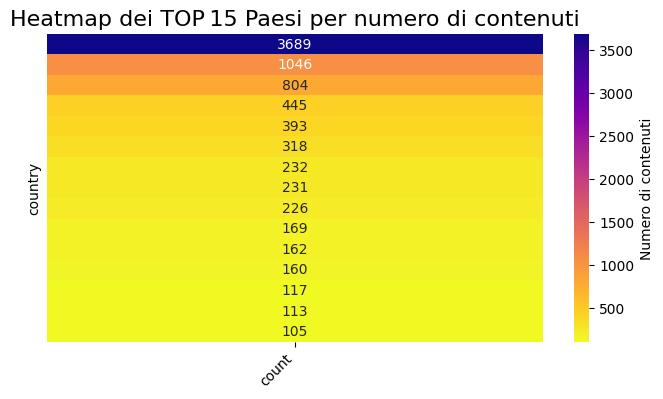

In [ ]:

heatmap_df = top_country.to_frame().T    
plt.figure(figsize=(8, 4)) 
sn.heatmap(heatmap_df, cmap='p', annot=True, fmt='d',
           cbar_kws={'label': 'Numero di contenuti'})
plt.yticks([])                            
plt.xticks(rotation=45, ha='right')
plt.title('Heatmap dei TOP 15 Paesi per numero di contenuti', fontsize=16)
plt.show()